In [146]:

import numpy as np
from numpy import *
from cmath import*
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as scp
from scipy.integrate import solve_ivp, odeint
import SALib
from SALib.sample import saltelli,morris,latin
from SALib.sample import morris
from SALib.analyze import sobol,dgsm,delta,rbd_fast
from SALib.analyze import morris
from SALib.plotting.bar import plot as barplot
from SALib.plotting.morris import *

In [19]:
# Define the model inputs

problem = {
    'num_vars': 8,
    'names': ['beta1', 'beta2', 'epsilon1','epsilon2','g12','gamma12','omega11','omega22'],
    'bounds': [[200, 2500000],
               [200, 2500000],
               [0.01, 100],
               [0.01, 100],
               [0.04, 600],
               [0.0002, 20],
               [0.002, 100],
               [0.002, 100]
               ]
}



In [20]:
# Generate samples
param_values1 = saltelli.sample(problem, 1000)
param_values2 =SALib.sample.morris.sample(problem, 1000)
param_values3 =SALib.sample.latin.sample(problem, 1000)



In [21]:
param_values1[0]

array([5.49472461e+05, 2.41879883e+05, 5.18602832e+01, 6.76790137e+01,
       1.68192852e+02, 1.81445498e+01, 4.59175195e+00, 8.99416074e+01])

In [22]:
param_values2[0]

array([2.00000000e+02, 2.50000000e+06, 1.00000000e-02, 6.66700000e+01,
       2.00026667e+02, 2.00000000e+01, 3.33346667e+01, 3.33346667e+01])

In [104]:
    Y1 = np.zeros([param_values1.shape[0]])

    ep2=[]
    ep3=[]
    ep4=[]
    ep5=[]
    Lambda1=[]
    Lambda2=[]
    Lambda3=[]
    Lambda4=[]
    Lambda5=[]
    for i in np.arange(len(Y1)): 
        beta1, beta2, epsilon1,epsilon2,g12,gamma12,omega11,omega22 =param_values1[i]

        U0=(beta1*gamma12 + beta1*omega22 - beta2*g12 + beta2*omega11 + g12*gamma12 + omega11*omega22)
        U1=(-epsilon1*(gamma12 + omega22) + epsilon2*(g12 - omega11) - g12*gamma12 - omega11*omega22)
        U2=(beta1*omega22 - beta2*g12 - epsilon1*(beta2 + omega22) + epsilon2*(beta1 + g12))
        U3=(beta1*gamma12 + beta2*omega11 + epsilon1*(beta2 - gamma12) - epsilon2*(beta1 + omega11))             
        
        E0=(epsilon1*(gamma12 + omega22) - epsilon2*(g12 - omega11) + g12*gamma12 + omega11*omega22)
        E1=(beta1*omega22 - beta2*g12 - epsilon1*(beta2 + omega22) + epsilon2*(beta1 + g12))
        E2=(beta1*gamma12 + beta2*omega11 + epsilon1*(beta2 - gamma12) - epsilon2*(beta1 + omega11))

        L0=(-3*U1*U2*beta1 - 3*U1*U2*omega11 - 3*U1*U3*beta2 - 3*U1*U3*omega22 + 3*U2*U3*g12*gamma12 + 3*U2*U3*omega11*omega22 - (-U1 + U2*omega11 + U3*omega22)**2)/U0**2
        L1=(-4*(3*U1*U2*beta1 + 3*U1*U2*omega11 + 3*U1*U3*beta2 + 3*U1*U3*omega22 - 3*U2*U3*g12*gamma12 - 3*U2*U3*omega11*omega22 + (-U1 + U2*omega11 + U3*omega22)**2)**3 + (-27*U1*U2*U3*beta1*gamma12 - 27*U1*U2*U3*beta1*omega22 + 27*U1*U2*U3*beta2*g12 - 27*U1*U2*U3*beta2*omega11 - 27*U1*U2*U3*g12*gamma12 - 27*U1*U2*U3*omega11*omega22 + 2*(-U1 + U2*omega11 + U3*omega22)**3 + 9*(-U1 + U2*omega11 + U3*omega22)*(U1*U2*beta1 + U1*U2*omega11 + U1*U3*beta2 + U1*U3*omega22 - U2*U3*g12*gamma12 - U2*U3*omega11*omega22))**2)/U0**6
        L2=(-27*U1*U2*U3*beta1*gamma12 - 27*U1*U2*U3*beta1*omega22 + 27*U1*U2*U3*beta2*g12 - 27*U1*U2*U3*beta2*omega11 - 27*U1*U2*U3*g12*gamma12 - 27*U1*U2*U3*omega11*omega22 + 2*(-U1 + U2*omega11 + U3*omega22)**3 + 9*(-U1 + U2*omega11 + U3*omega22)*(U1*U2*beta1 + U1*U2*omega11 + U1*U3*beta2 + U1*U3*omega22 - U2*U3*g12*gamma12 - U2*U3*omega11*omega22))/(2*U0**3)


        mu0=-4*beta1**2*epsilon1 + beta1**2*omega11**2 - 4*beta1**2*omega11 + 4*beta1*epsilon1**2 - 2*beta1*epsilon1*omega11**2 + 2*beta1*epsilon1*omega11 - 2*beta1*omega11**2 + epsilon1**2*omega11**2 + 2*epsilon1**2*omega11 + epsilon1**2 + 2*epsilon1*omega11**2 + 2*epsilon1*omega11 + omega11**2
        mu1=-4*beta2**2*epsilon2 + beta2**2*omega22**2 - 4*beta2**2*omega22 + 4*beta2*epsilon2**2 - 2*beta2*epsilon2*omega22**2 + 2*beta2*epsilon2*omega22 - 2*beta2*omega22**2 + epsilon2**2*omega22**2 + 2*epsilon2**2*omega22 + epsilon2**2 + 2*epsilon2*omega22**2 + 2*epsilon2*omega22 + omega22**2
        mu2=np.sqrt(L1+0j)/2 +L2
        
        EP1=np.array([0,0,0])
        EP2=np.array([1, 0, 0])
        EP3=np.array([(epsilon1 + omega11)/(beta1 + omega11), (beta1 - epsilon1)/(beta1 + omega11), 0])
        EP4=np.array([(epsilon2 + omega22)/(beta2 + omega22), 0, (beta2 - epsilon2)/(beta2 + omega22)])
        EP5=np.array([E0/U0,E1/U0,E2/U0])
        
        lambda1=np.array([1, -epsilon1, -epsilon2])
        lambda2=np.array([-1, beta1 - epsilon1, beta2 - epsilon2])
        lambda3=np.array([E2/(beta1 + omega11),((omega11*(epsilon1-beta1-1)-epsilon1)+np.sqrt(0j+mu0))/(2*(beta1 + omega11)),((omega11*(epsilon1-beta1-1)-epsilon1)-np.sqrt(0j+mu0))/(2*(beta1 + omega11))])
        lambda4=np.array([E1/(beta2 + omega22),((omega22*(epsilon2-beta2-1)-epsilon2)+np.sqrt(0j+mu1))/(2*(beta2 + omega22)),((omega22*(epsilon2-beta2-1)-epsilon1)-np.sqrt(0j+mu1))/(2*(beta2 + omega22))])
        lambda51=L0/(3*mu2**(1/3))-(mu2**(1/3))/3+(U1-U2*omega11-U3*omega22)/(3*U0)
        lambda52=L0/((3*mu2**(1/3))*(-1/2+0.8660254037844386j))-(mu2**(1/3))*(-1/2+0.8660254037844386j)/3+(U1-U2*omega11-U3*omega22)/(3*U0)
        lambda53=L0/((3*mu2**(1/3))*(-1/2-0.8660254037844386j))-(mu2**(1/3))*(-1/2-0.8660254037844386j)/3+(U1-U2*omega11-U3*omega22)/(3*U0)
        lambda5=np.array([lambda51,lambda52,lambda53])
       
        ep2.append(EP2)                   
        ep3.append(EP3)     
        ep4.append(EP4)                 
        ep5.append(EP5)
        Lambda1.append(lambda1) 
        Lambda2.append(lambda2)
        Lambda3.append(lambda3)
        Lambda4.append(lambda4)
        Lambda5.append(lambda5)
    
    
       
     
        #print(EP5[(EP6[0]>0 and EP5[1]>0 and EP5[2]>0)]) # to get only positive EP
        #print(EP5)
        #print(lambda5<0) # to get only stable EP
        #print(lambda5[(lambda6[0]<0 and lambda5[1]<0 and lambda5[2]<0 )]) # to get only positive EP
        #print(lambda6[(lambda5[0]>0 or lambda5[1]>0 or lambda6[2]>0 )]) # to get only positive EP
        #print(EV3<0) # to get only stable EP
        #print(EV3[(EV3[0]<0 and EV3[1]<0 and EV3[2]<0)]) # to get only positive EP
        #print(EV3[(EV3[0]>0 or EV3[1]>0 or EV3[2]>0)]) # to get only positive EP
        #print(EV4<0) # to get only stable EP
        #print(EV4[(EV4[0]<0 and EV4[1]<0 and EV4[2]<0)]) # to get only positive EP
        #print(EV4[(EV4[0]>0 or EV4[1]>0 or EV4[2]>0)]) # to get only positive EP
        #print(beta1>epsilon1,beta2>epsilon2)
        if EP5[0]>0 and EP5[1]>0 and EP5[2]>0: 
            print(param_values1[i])
            print(EP5>0)
            print(lambda3<0)
            print(lambda4<0)
            print(lambda5<0)
       

[5.49472461e+05 2.41879883e+05 5.18602832e+01 2.54957324e+01
 1.68192852e+02 1.81445498e+01 4.59175195e+00 8.99416074e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.79937246e+06 1.49177988e+06 1.86528320e+00 7.54907324e+01
 4.68172852e+02 8.14464980e+00 5.45907520e+01 3.99426074e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.42432246e+06 8.66829883e+05 7.68577832e+01 9.26765137e+01
 3.18182852e+02 3.14469980e+00 2.95912520e+01 1.49431074e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.42432246e+06 8.66829883e+05 8.34977441e+01 9.26765137e+01
 3.18182852e+02 3.14469980e+00 2.95912520e+01 1.49431074e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.42432246e+06 8.66829883e+05 7.68577832e+01 5.04932324e+01
 3.18182852e+02 3.14469980e+00 2.95912520e+01 1.49431074e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[Fals

[False  True  True]
[1.39046963e+06 1.01452314e+06 4.62456104e+01 8.74524268e+01
 2.49925684e+02 1.83300948e+01 1.16716885e+01 5.28818018e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.39046963e+06 1.01452314e+06 4.62456104e+01 8.74524268e+01
 3.02070645e+02 1.90722749e+01 1.16716885e+01 5.28818018e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.39046963e+06 1.01452314e+06 4.62456104e+01 8.74524268e+01
 3.02070645e+02 1.83300948e+01 1.16716885e+01 9.78027783e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.39046963e+06 1.01452314e+06 4.62456104e+01 8.74524268e+01
 3.02070645e+02 1.83300948e+01 1.16716885e+01 5.28818018e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[7.45989941e+05 2.23024619e+06 2.59763184e+00 1.90022412e+01
 2.09064453e+00 9.07237490e+00 1.94840322e+01 4.78037783e+01]
[ True  True  True]
[False  True  True]
[Fals

[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[7.65519629e+05 7.65519629e+05 5.33738037e+01 7.88595361e+01
 3.38982246e+02 2.66618896e+00 6.20304785e+00 4.07726689e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[7.65519629e+05 1.07311221e+06 4.07774072e+01 7.88595361e+01
 5.31742832e+02 3.17399639e+00 3.07811035e+00 2.55385986e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[9.80346191e+05 7.65519629e+05 4.07774072e+01 7.88595361e+01
 5.31742832e+02 3.17399639e+00 3.07811035e+00 2.55385986e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[9.80346191e+05 1.07311221e+06 5.33738037e+01 7.88595361e+01
 5.31742832e+02 3.17399639e+00 3.07811035e+00 2.55385986e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[9.80346191e+05 1.07311221e+06 4.07774072e+01 5.72796631e+01
 5.31742832e+02 3.17399639e+00 3.07811035e+00 2

 3.25573633e+01 1.74707284e+01 2.45620557e+01 8.13968564e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.41976416e+06 1.84511426e+05 2.16386963e+01 1.47057959e+01
 3.25573633e+01 1.74707284e+01 2.45620557e+01 8.13968564e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.20493760e+06 4.43279785e+05 8.81359521e+01 3.70668408e+01
 1.53838340e+02 1.35254554e+01 3.46872754e+00 5.67879736e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.20493760e+06 4.43279785e+05 8.81359521e+01 2.20704590e+00
 1.53838340e+02 1.35254554e+01 3.46872754e+00 9.38966064e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.45483760e+06 1.12193643e+06 3.81409521e+01 5.22020459e+01
 4.53818340e+02 3.52555537e+00 5.34677275e+01 6.78897363e+00]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.45483760e+06 1.69317979e+06 9.13994629e+00 

 3.74136152e+02 1.18067226e+01 4.79990869e+01 1.65544033e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.63459072e+06 1.14146611e+06 4.27303369e+01 2.37869189e+01
 7.41561523e+01 1.27151855e-01 4.72178525e+01 6.65534033e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.32211572e+06 2.04041113e+05 3.02315869e+01 6.12831689e+01
 4.49131152e+02 1.76269769e+01 8.47171025e+01 4.05465332e+00]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.45882354e+06 3.45631348e+05 5.23408691e+00 2.95480615e+01
 5.99121152e+02 1.43066976e+01 1.04998369e+01 3.10072393e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.45882354e+06 3.45631348e+05 9.82911865e+01 8.62806689e+01
 5.99121152e+02 1.43066976e+01 1.04998369e+01 3.10072393e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.45882354e+06 3.45631348e+05 9.82911865e+01 

 4.96003027e+02 1.77441632e+01 6.20613057e+01 4.81943955e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.26352666e+06 3.06571973e+05 2.17363428e+01 4.36091553e+01
 3.46013027e+02 1.27442132e+01 3.70618057e+01 2.31948955e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[6.58106348e+05 3.06571973e+05 2.17363428e+01 4.36091553e+01
 3.46013027e+02 1.27442132e+01 3.70618057e+01 2.31948955e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[1.26352666e+06 3.06571973e+05 4.42926807e+01 4.36091553e+01
 3.46013027e+02 1.27442132e+01 3.70618057e+01 2.31948955e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.26352666e+06 3.06571973e+05 2.17363428e+01 4.36091553e+01
 3.46013027e+02 9.18956123e+00 3.70618057e+01 2.31948955e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.26352666e+06 3.06571973e+05 2.17363428e+01 

[ True  True  True]
[ True  True  True]
[ True False  True]
[1.15123096e+06 6.62988770e+05 6.99737061e+01 9.49712061e+01
 1.62040918e+02 1.93457097e+01 2.67104502e+01 3.51087197e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.15123096e+06 6.97165723e+05 6.99737061e+01 9.49712061e+01
 1.62040918e+02 1.93457097e+01 2.67104502e+01 3.51087197e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.15123096e+06 6.62988770e+05 6.99737061e+01 9.07724072e+01
 1.62040918e+02 1.93457097e+01 2.67104502e+01 3.51087197e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.15123096e+06 6.62988770e+05 6.99737061e+01 9.49712061e+01
 1.62040918e+02 1.87597780e+01 2.67104502e+01 3.51087197e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.15123096e+06 6.62988770e+05 6.99737061e+01 9.49712061e+01
 1.62040918e+02 1.93457097e+01 3.99914346e+01 3.51087197e+01]
[ Tru

[1.52229502e+06 7.60637207e+05 6.28455127e+01 7.38795654e+01
 5.88574980e+02 1.85644675e+01 3.37415596e+01 5.30771104e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.52229502e+06 7.60637207e+05 6.60678467e+01 7.38795654e+01
 5.88574980e+02 8.60362959e+00 3.37415596e+01 5.30771104e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.52229502e+06 7.60637207e+05 6.60678467e+01 7.38795654e+01
 5.88574980e+02 1.85644675e+01 3.37415596e+01 2.10465010e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.28395283e+06 2.01053721e+06 1.28505127e+01 9.15535791e+01
 4.55576035e+02 1.86035296e+01 3.76477314e+01 7.10455010e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.28395283e+06 9.51051660e+05 1.60728467e+01 9.15535791e+01
 4.55576035e+02 1.86035296e+01 3.76477314e+01 7.10455010e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[Fals

 5.48733887e+02 1.27051511e+01 6.78897363e+00 7.45610557e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.33277705e+06 2.33277705e+06 5.88232422e-02 9.14559326e+01
 2.48753887e+02 2.70525107e+00 5.67879736e+01 2.45620557e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.33277705e+06 2.33277705e+06 1.24599268e+01 9.14559326e+01
 2.48753887e+02 2.70525107e+00 5.67879736e+01 2.45620557e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.33277705e+06 2.33277705e+06 5.88232422e-02 7.39772119e+01
 2.48753887e+02 2.70525107e+00 5.67879736e+01 2.45620557e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.33277705e+06 2.33277705e+06 5.88232422e-02 9.14559326e+01
 4.81355566e+02 2.70525107e+00 5.67879736e+01 2.45620557e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.33277705e+06 2.33277705e+06 5.88232422e-02 

[ True False  True]
[2.31324736e+06 6.72753613e+05 5.55220264e+01 2.81810107e+01
 3.78304492e+01 9.11143701e+00 6.85064893e+01 1.75309463e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.31324736e+06 6.72753613e+05 5.07373486e+01 2.81810107e+01
 3.78304492e+01 9.11143701e+00 6.85064893e+01 1.75309463e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.31324736e+06 6.72753613e+05 5.55220264e+01 1.69516650e+01
 3.78304492e+01 9.11143701e+00 6.85064893e+01 1.75309463e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.31324736e+06 6.72753613e+05 5.55220264e+01 2.81810107e+01
 3.78304492e+01 9.61924443e+00 6.85064893e+01 1.75309463e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.31324736e+06 6.72753613e+05 5.55220264e+01 2.81810107e+01
 3.78304492e+01 9.11143701e+00 1.38200830e+01 1.75309463e+01]
[ True  True  True]
[False  True  True]
[Fals

[1.66632646e+06 8.60726855e+05 1.88069482e+01 3.67739014e+01
 1.17512637e+02 1.29199927e+01 2.32925498e+01 5.08271484e-02]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[1.66632646e+06 1.03161162e+06 1.88069482e+01 3.67739014e+01
 1.17512637e+02 1.29199927e+01 1.58708232e+01 5.08271484e-02]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.66632646e+06 1.03161162e+06 1.88069482e+01 3.67739014e+01
 1.17512637e+02 1.29199927e+01 2.32925498e+01 6.50885889e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[8.65609277e+05 4.06661621e+05 2.45680908e+01 9.11629932e+01
 5.71583926e+02 1.88183712e+01 9.08693232e+01 9.00880889e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[1.17808428e+06 5.48251855e+05 3.70668408e+01 7.86642432e+01
 4.96588926e+02 1.13184462e+01 2.83705732e+01 2.75893389e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[Fals

 3.32537363e+02 3.34977588e+00 7.29009326e+01 9.71191982e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.15456865e+06 7.77725684e+05 1.64634326e+01 9.03818213e+01
 4.59677324e+02 1.46387255e+01 2.40737842e+01 7.27056240e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.15456865e+06 7.77725684e+05 1.64634326e+01 3.59927295e+01
 3.32537363e+02 1.46387255e+01 2.40737842e+01 7.27056240e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.15456865e+06 7.77725684e+05 1.64634326e+01 3.59927295e+01
 4.59677324e+02 3.34977588e+00 2.40737842e+01 7.27056240e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.15456865e+06 7.77725684e+05 1.64634326e+01 3.59927295e+01
 4.59677324e+02 1.46387255e+01 2.40737842e+01 9.71191982e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.15456865e+06 7.77725684e+05 1.64634326e+01 

 4.38584980e+02 1.42090423e+01 5.32415918e+00 6.93853779e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[5.04310059e+05 3.62719824e+05 2.41775049e+01 7.51489697e+01
 3.30193770e+02 2.21697471e+00 5.32415918e+00 6.93853779e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[5.04310059e+05 3.62719824e+05 2.41775049e+01 7.51489697e+01
 3.30193770e+02 1.42090423e+01 5.32415918e+00 2.30972412e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[5.62899121e+05 3.62719824e+05 1.45105029e+01 6.05996436e+01
 4.38584980e+02 2.21697471e+00 7.05572295e+01 2.30972412e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[1.75421006e+06 6.31253027e+05 7.41725049e+01 2.51539697e+01
 3.02137695e+01 4.20914229e+00 5.53231592e+01 1.93863779e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.75421006e+06 1.61261982e+06 7.41725049e+01 

 3.87025918e+02 1.83105638e+01 1.66520576e+01 7.85648818e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.79326943e+06 7.67960840e+05 3.74574268e+01 4.41950342e+01
 2.37035918e+02 3.31071377e+00 4.16515576e+01 3.56638184e+00]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[1.48079443e+06 4.55485840e+05 5.27879248e+01 5.24949854e+01
 1.62040918e+02 1.58105888e+01 7.91508076e+01 6.60651318e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.48079443e+06 4.55485840e+05 5.27879248e+01 8.16912842e+01
 5.12994082e+02 1.58105888e+01 7.91508076e+01 6.60651318e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.24245225e+06 1.70538584e+06 2.79292480e+00 3.16962842e+01
 4.62020918e+02 5.81068877e+00 2.91518076e+01 1.60661318e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[8.55844434e+05 4.99427637e+05 9.99511768e+01 

 9.64202930e+01 4.05289385e+00 7.64164873e+01 8.26663623e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.59797256e+06 2.60188965e+05 4.35526855e+00 1.13858154e+01
 2.41137207e+02 1.36231106e+01 9.94629014e+01 5.51278506e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.59797256e+06 2.60188965e+05 4.35526855e+00 1.13858154e+01
 3.96400293e+02 1.40527938e+01 9.94629014e+01 5.51278506e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.59797256e+06 2.60188965e+05 4.35526855e+00 1.13858154e+01
 3.96400293e+02 1.36231106e+01 2.64174873e+01 5.51278506e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.59797256e+06 2.60188965e+05 4.35526855e+00 1.13858154e+01
 3.96400293e+02 1.36231106e+01 9.94629014e+01 5.51278506e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.51497139e+06 9.33963184e+05 1.69516650e+01 

 6.24381836e+01 1.34278001e+01 8.48147568e+01 8.61819170e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.49145576e+06 1.69073857e+06 7.52466162e+01 2.09551709e+01
 6.24381836e+01 1.34278001e+01 1.41130459e+01 8.61819170e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.39380732e+06 4.40838574e+05 7.78830713e+01 5.58149658e+01
 4.13391348e+02 1.80761911e+01 3.48157568e+01 1.91910693e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.39380732e+06 1.28549756e+06 2.52516162e+01 5.58149658e+01
 4.13391348e+02 1.80761911e+01 3.48157568e+01 1.91910693e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[1.24155576e+06 4.40838574e+05 7.78830713e+01 7.09501709e+01
 3.62418184e+02 3.42790010e+00 6.41120459e+01 3.61829170e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[1.24155576e+06 4.40838574e+05 2.52516162e+01 

 4.04602871e+02 1.92089923e+01 8.83303115e+01 1.50895889e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[7.14254199e+05 7.33783887e+05 1.04093506e+01 9.67288428e+01
 4.04602871e+02 1.92089923e+01 4.34761621e+00 1.50895889e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.33920420e+06 1.38314600e+06 8.64759619e+01 7.53442627e+01
 3.37291602e+01 1.97949239e+01 2.93471162e+01 9.34083350e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.86952637e+05 5.51272461e+04 2.08575244e+01 2.22245752e+01
 5.77442910e+02 4.17008018e+00 7.47255371e+00 4.02843975e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.86952637e+05 5.51272461e+04 2.08575244e+01 4.36091553e+01
 5.77442910e+02 4.17008018e+00 7.47255371e+00 4.02843975e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.86952637e+05 5.51272461e+04 2.08575244e+01 

 4.11047754e+02 1.01856450e+01 4.34761621e+00 5.23935303e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[9.19315918e+05 1.23667334e+06 5.17138135e+01 9.05771143e+01
 3.60727539e+01 7.68567002e+00 9.84863584e+01 6.48932803e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.05602373e+06 1.23667334e+06 5.17138135e+01 9.05771143e+01
 3.60727539e+01 7.68567002e+00 9.84863584e+01 6.48932803e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[9.19315918e+05 1.23667334e+06 5.17138135e+01 9.39947412e+01
 3.60727539e+01 7.68567002e+00 9.84863584e+01 6.48932803e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[9.19315918e+05 1.23667334e+06 5.17138135e+01 9.05771143e+01
 3.60727539e+01 1.47479463e+00 9.84863584e+01 6.48932803e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[9.19315918e+05 1.23667334e+06 5.17138135e+01 

In [105]:
ep1_all=np.zeros(len(Y1))
ep2_all=np.stack(ep2)
ep3_all=np.stack(ep3)
ep4_all=np.stack(ep4)
ep5_all=np.vstack(ep5)
lamda5_all= np.stack( Lambda5)


In [106]:
print(ep5_all[:,0]==0)

[False False False ... False False False]


In [107]:
ep5_all

array([[-1.01009359e-04,  1.68441401e+00, -6.84313005e-01],
       [-2.08968300e-05,  1.50506806e+00, -5.05047167e-01],
       [-6.45774135e-05,  1.56201582e+00, -5.61951247e-01],
       ...,
       [ 7.88648429e-05,  6.49115860e-01,  3.50805276e-01],
       [-2.85246765e-04,  5.47849544e+00, -4.47821020e+00],
       [ 2.29233449e-04, -8.26905431e-01,  1.82667620e+00]])

In [108]:
print(np.amax(ep5_all[:,0]),np.amin(ep5_all[:,0]))
print(np.amax(ep5_all[:,1]),np.amin(ep5_all[:,1]))
print(np.amax(ep5_all[:,2]),np.amin(ep5_all[:,2]))

0.2094982625764092 -0.10929304555385126
724.2158021941007 -840.3364266634163
841.1269284008398 -723.1065091485466


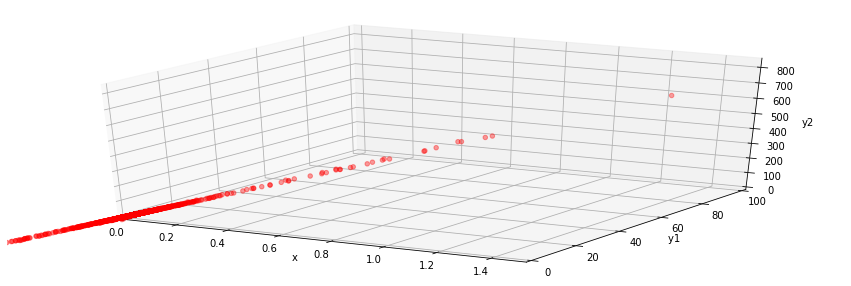

In [109]:
fig=plt.figure(figsize=(15,5))
#ax.scatter(EP2[0],EP2[1],EP2[2], c='g',marker='o')
#ax.scatter(EP3[0],EP3[1],EP3[2], c='b',marker='o')
ax = plt.axes(projection="3d") 
ax.scatter(ep5_all[:,0],ep5_all[:,1],ep5_all[:,2], c='r', marker='o')
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 100])
ax.set_zlim([0, 841])
ax.set_xlabel('x ')
ax.set_ylabel('y1 ')
ax.set_zlabel('y2')
plt.show()


# Sensivity analysis for interior EP using sobol method

                 ST    ST_conf
beta2     17.179385  62.533432
epsilon2   3.790657  14.087103
omega11    1.188828   3.136613
beta1      0.663464   1.626736
omega22    0.377170   0.684654
g12        0.205216   0.332024
gamma12    0.140923   0.294151
epsilon1   0.067014   0.171646
                S1   S1_conf
beta1     0.173173  0.556284
omega11   0.060446  0.207357
epsilon2  0.004542  0.013596
epsilon1  0.004155  0.006699
g12       0.000757  0.021498
gamma12  -0.000239  0.004381
omega22  -0.007986  0.031201
beta2    -0.020033  0.128068
                            S2   S2_conf
(beta2, epsilon2)     0.026839  0.126962
(beta2, omega22)      0.015371  0.140529
(beta2, epsilon1)     0.011906  0.110968
(beta2, gamma12)      0.011717  0.116469
(g12, omega22)        0.002657  0.040153
(epsilon1, omega22)   0.000203  0.010930
(epsilon2, omega22)  -0.000196  0.014567
(gamma12, omega22)   -0.001178  0.011277
(epsilon2, omega11)  -0.001690  0.022069
(epsilon2, g12)      -0.002752  0.016865
(epsilon1

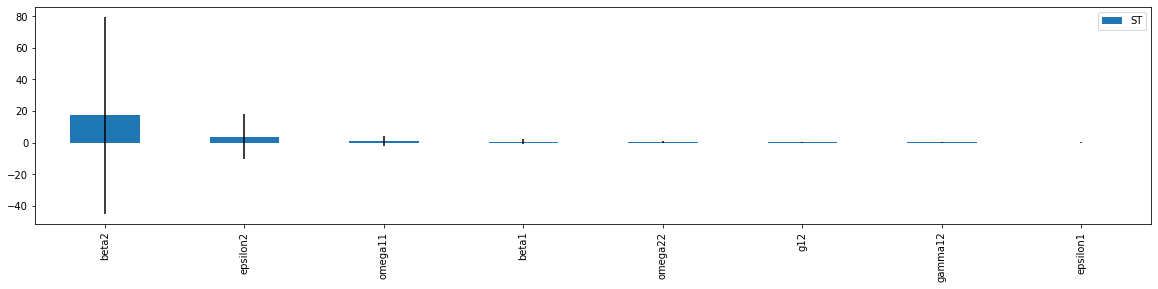

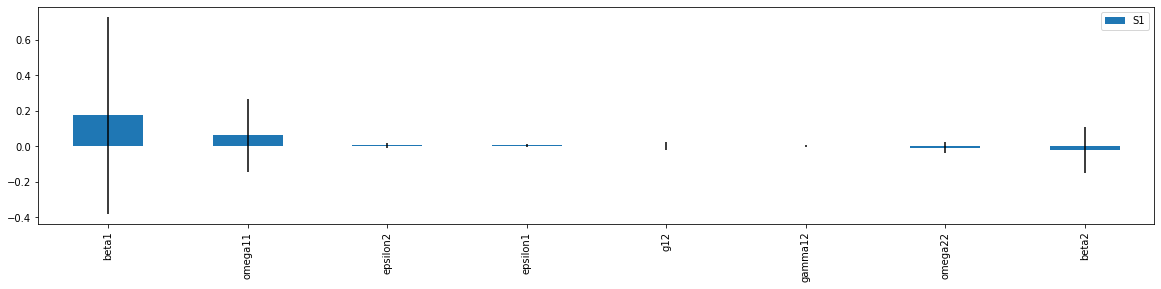

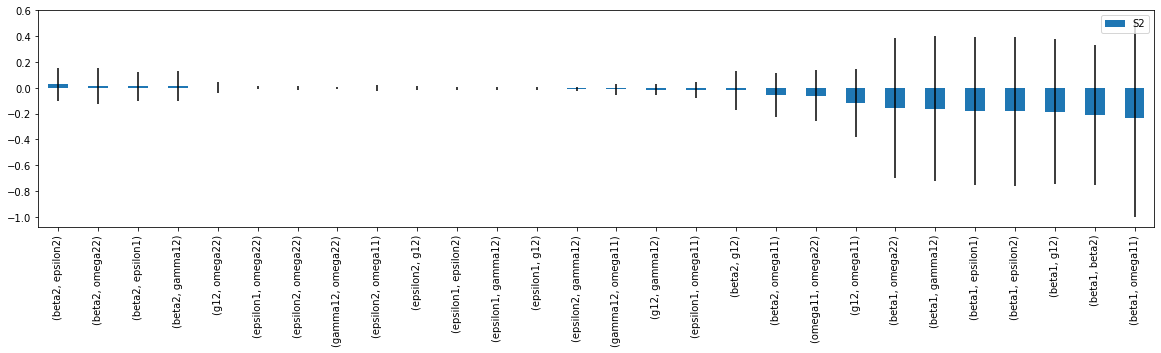

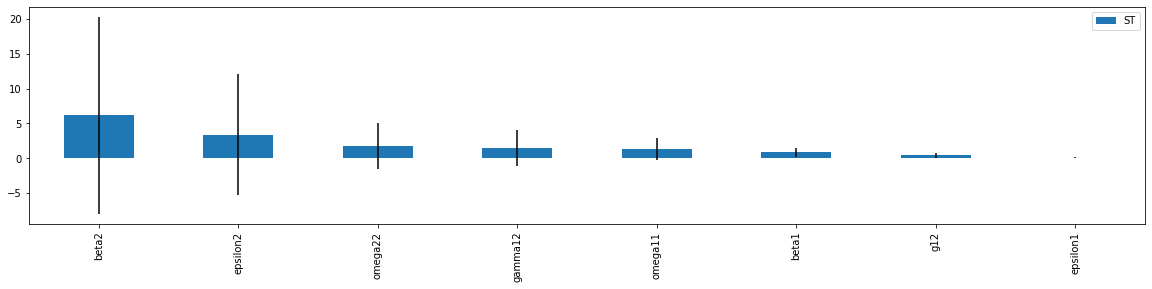

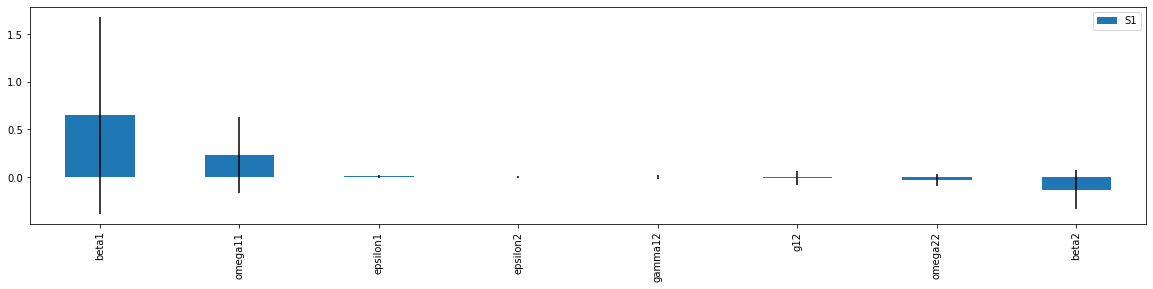

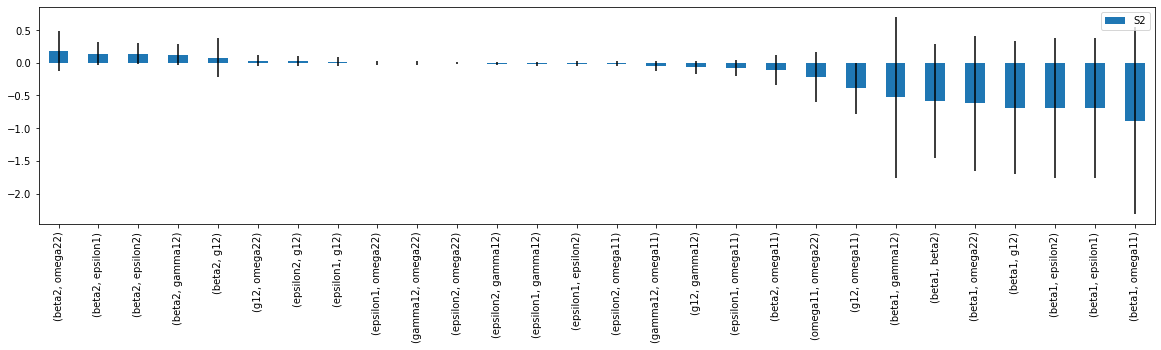

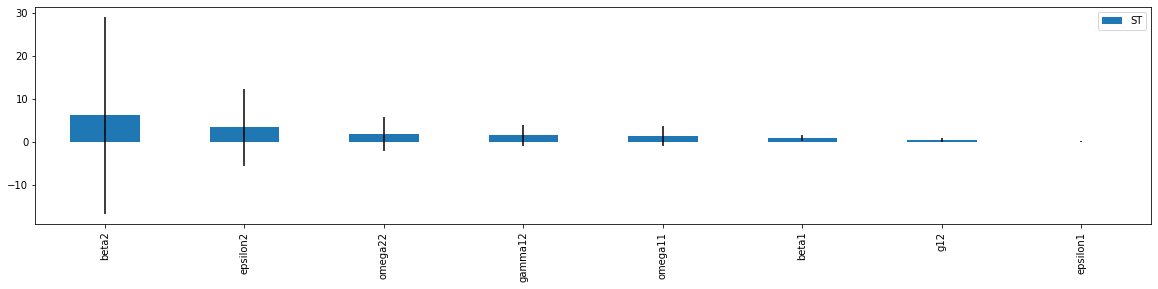

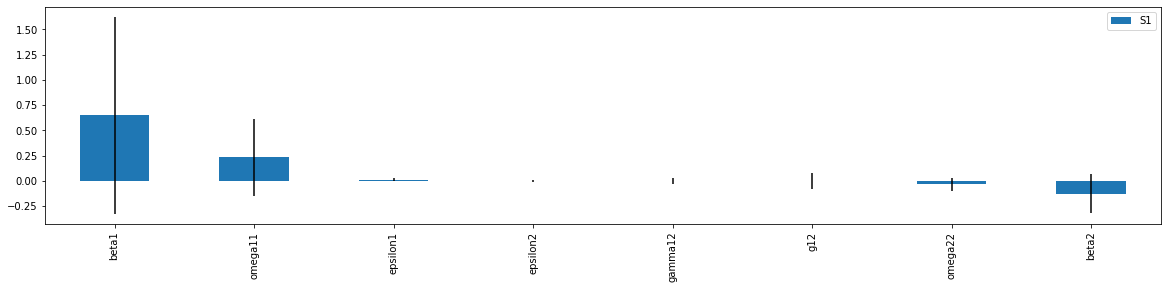

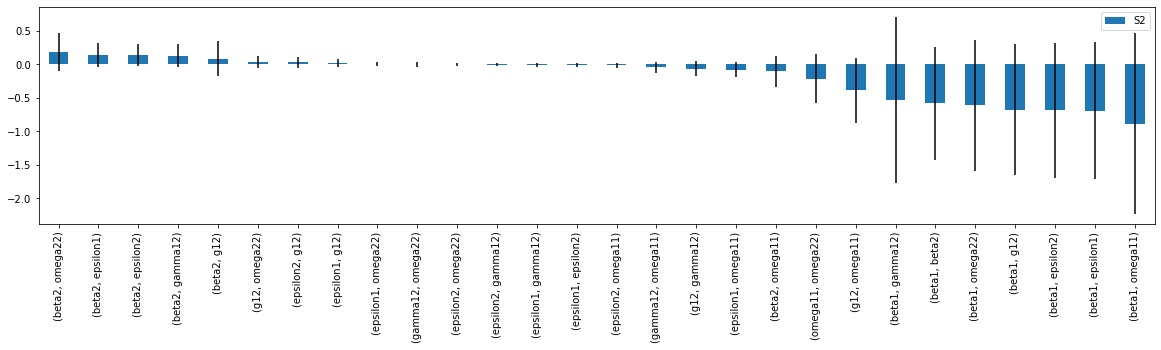

In [110]:
SOBOL=[ep5_all[:,0],ep5_all[:,1],ep5_all[:,2]]
Total_Sobol=[]
First_Sobol=[]
Second_Sobol=[]
for i in SOBOL:
    SI_Sobol=sobol.analyze(problem, i)
    total, first, second =SI_Sobol.to_df()
    total.sort_values(by=['ST'], inplace=True, ascending=False)
    first.sort_values(by=['S1'], inplace=True, ascending=False)
    second.sort_values(by=['S2'], inplace=True, ascending=False)
    Total_Sobol.append(total)
    First_Sobol.append(first)
    Second_Sobol.append(second)
    
    print(total)
    barplot(total)
    print(first)
    print(second)
    plt.gcf().set_size_inches(20, 4)
   
    barplot(first)
    plt.gcf().set_size_inches(20, 4)
   
    barplot(second)
    #plt.xlim([-1, 5])
    #plt.ylim([-1, 1.5])
    plt.gcf().set_size_inches(20, 4)
    print(total.to_latex(index=True))
    print(first.to_latex(index=True))
    print(second.to_latex(index=True))
STx,STy1,STy2=Total_Sobol 
S1x,S1y1,S1y2=First_Sobol
S2x,S2y1,S2y2=Second_Sobol    

# Convert dataframe into latex table

In [111]:
x_Sobol=[STx,S1x,S2x]
y1_Sobol=[STy1,S1y1,S2y1]
y2_Sobol=[STy2,S1y2,S2y2]


In [112]:
for i in x_Sobol:   
    print(i.to_latex(index=True))

\begin{tabular}{lrr}
\toprule
{} &         ST &    ST\_conf \\
\midrule
beta2    &  17.179385 &  62.533432 \\
epsilon2 &   3.790657 &  14.087103 \\
omega11  &   1.188828 &   3.136613 \\
beta1    &   0.663464 &   1.626736 \\
omega22  &   0.377170 &   0.684654 \\
g12      &   0.205216 &   0.332024 \\
gamma12  &   0.140923 &   0.294151 \\
epsilon1 &   0.067014 &   0.171646 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &        S1 &   S1\_conf \\
\midrule
beta1    &  0.173173 &  0.556284 \\
omega11  &  0.060446 &  0.207357 \\
epsilon2 &  0.004542 &  0.013596 \\
epsilon1 &  0.004155 &  0.006699 \\
g12      &  0.000757 &  0.021498 \\
gamma12  & -0.000239 &  0.004381 \\
omega22  & -0.007986 &  0.031201 \\
beta2    & -0.020033 &  0.128068 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &        S2 &   S2\_conf \\
\midrule
(beta2, epsilon2)    &  0.026839 &  0.126962 \\
(beta2, omega22)     &  0.015371 &  0.140529 \\
(beta2, epsilon1)    &  0.011906 &  0.110968 \

In [113]:
for i in y1_Sobol:   
    print(i.to_latex(index=True))

\begin{tabular}{lrr}
\toprule
{} &        ST &    ST\_conf \\
\midrule
beta2    &  6.136988 &  14.198018 \\
epsilon2 &  3.341302 &   8.684891 \\
omega22  &  1.772758 &   3.346011 \\
gamma12  &  1.496889 &   2.583837 \\
omega11  &  1.347521 &   1.566391 \\
beta1    &  0.843291 &   0.626152 \\
g12      &  0.392327 &   0.412139 \\
epsilon1 &  0.071408 &   0.104814 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &        S1 &   S1\_conf \\
\midrule
beta1    &  0.646629 &  1.036100 \\
omega11  &  0.231888 &  0.396611 \\
epsilon1 &  0.009312 &  0.015245 \\
epsilon2 &  0.001682 &  0.011199 \\
gamma12  & -0.001135 &  0.020194 \\
g12      & -0.004513 &  0.073705 \\
omega22  & -0.034722 &  0.063275 \\
beta2    & -0.130000 &  0.200567 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &        S2 &   S2\_conf \\
\midrule
(beta2, omega22)     &  0.180953 &  0.307900 \\
(beta2, epsilon1)    &  0.140105 &  0.174145 \\
(beta2, epsilon2)    &  0.137073 &  0.162116 \\
(beta2,

In [114]:
for i in y2_Sobol:   
    print(i.to_latex(index=True))

\begin{tabular}{lrr}
\toprule
{} &        ST &    ST\_conf \\
\midrule
beta2    &  6.135395 &  22.944131 \\
epsilon2 &  3.340964 &   8.881288 \\
omega22  &  1.772974 &   4.002570 \\
gamma12  &  1.497090 &   2.395718 \\
omega11  &  1.347478 &   2.393462 \\
beta1    &  0.843298 &   0.687586 \\
g12      &  0.392362 &   0.509167 \\
epsilon1 &  0.071406 &   0.129411 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &        S1 &   S1\_conf \\
\midrule
beta1    &  0.646664 &  0.978432 \\
omega11  &  0.231901 &  0.378675 \\
epsilon1 &  0.009311 &  0.014631 \\
epsilon2 &  0.001682 &  0.010897 \\
gamma12  & -0.001135 &  0.029485 \\
g12      & -0.004514 &  0.078569 \\
omega22  & -0.034724 &  0.062945 \\
beta2    & -0.130007 &  0.193305 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &        S2 &   S2\_conf \\
\midrule
(beta2, omega22)     &  0.180970 &  0.285449 \\
(beta2, epsilon1)    &  0.140117 &  0.179972 \\
(beta2, epsilon2)    &  0.137081 &  0.163689 \\
(beta2,

# Sensivity analysis for interior EP using morris method

In [126]:
    Y2 = np.zeros([param_values2.shape[0]])
    pm=[]
    e2=[]
    e3=[]
    e4=[]
    e5=[]
    Lamda1=[]
    Lamda2=[]
    Lamda3=[]
    Lamda4=[]
    Lamda5=[]
   
    for i in np.arange(len(Y2)): 
        beta1, beta2, epsilon1,epsilon2,g12,gamma12,omega11,omega22 =param_values2[i]
        U0=(beta1*gamma12 + beta1*omega22 - beta2*g12 + beta2*omega11 + g12*gamma12 + omega11*omega22)
        U1=(-epsilon1*(gamma12 + omega22) + epsilon2*(g12 - omega11) - g12*gamma12 - omega11*omega22)
        U2=(beta1*omega22 - beta2*g12 - epsilon1*(beta2 + omega22) + epsilon2*(beta1 + g12))
        U3=(beta1*gamma12 + beta2*omega11 + epsilon1*(beta2 - gamma12) - epsilon2*(beta1 + omega11))             
        
        E0=(epsilon1*(gamma12 + omega22) - epsilon2*(g12 - omega11) + g12*gamma12 + omega11*omega22)
        E1=(beta1*omega22 - beta2*g12 - epsilon1*(beta2 + omega22) + epsilon2*(beta1 + g12))
        E2=(beta1*gamma12 + beta2*omega11 + epsilon1*(beta2 - gamma12) - epsilon2*(beta1 + omega11))

        L0=(-3*U1*U2*beta1 - 3*U1*U2*omega11 - 3*U1*U3*beta2 - 3*U1*U3*omega22 + 3*U2*U3*g12*gamma12 + 3*U2*U3*omega11*omega22 - (-U1 + U2*omega11 + U3*omega22)**2)/U0**2
        L1=(-4*(3*U1*U2*beta1 + 3*U1*U2*omega11 + 3*U1*U3*beta2 + 3*U1*U3*omega22 - 3*U2*U3*g12*gamma12 - 3*U2*U3*omega11*omega22 + (-U1 + U2*omega11 + U3*omega22)**2)**3 + (-27*U1*U2*U3*beta1*gamma12 - 27*U1*U2*U3*beta1*omega22 + 27*U1*U2*U3*beta2*g12 - 27*U1*U2*U3*beta2*omega11 - 27*U1*U2*U3*g12*gamma12 - 27*U1*U2*U3*omega11*omega22 + 2*(-U1 + U2*omega11 + U3*omega22)**3 + 9*(-U1 + U2*omega11 + U3*omega22)*(U1*U2*beta1 + U1*U2*omega11 + U1*U3*beta2 + U1*U3*omega22 - U2*U3*g12*gamma12 - U2*U3*omega11*omega22))**2)/U0**6
        L2=(-27*U1*U2*U3*beta1*gamma12 - 27*U1*U2*U3*beta1*omega22 + 27*U1*U2*U3*beta2*g12 - 27*U1*U2*U3*beta2*omega11 - 27*U1*U2*U3*g12*gamma12 - 27*U1*U2*U3*omega11*omega22 + 2*(-U1 + U2*omega11 + U3*omega22)**3 + 9*(-U1 + U2*omega11 + U3*omega22)*(U1*U2*beta1 + U1*U2*omega11 + U1*U3*beta2 + U1*U3*omega22 - U2*U3*g12*gamma12 - U2*U3*omega11*omega22))/(2*U0**3)


        mu0=-4*beta1**2*epsilon1 + beta1**2*omega11**2 - 4*beta1**2*omega11 + 4*beta1*epsilon1**2 - 2*beta1*epsilon1*omega11**2 + 2*beta1*epsilon1*omega11 - 2*beta1*omega11**2 + epsilon1**2*omega11**2 + 2*epsilon1**2*omega11 + epsilon1**2 + 2*epsilon1*omega11**2 + 2*epsilon1*omega11 + omega11**2
        mu1=-4*beta2**2*epsilon2 + beta2**2*omega22**2 - 4*beta2**2*omega22 + 4*beta2*epsilon2**2 - 2*beta2*epsilon2*omega22**2 + 2*beta2*epsilon2*omega22 - 2*beta2*omega22**2 + epsilon2**2*omega22**2 + 2*epsilon2**2*omega22 + epsilon2**2 + 2*epsilon2*omega22**2 + 2*epsilon2*omega22 + omega22**2
        mu2=np.sqrt(L1+0j)/2 +L2
        
        EP1=np.array([0,0,0])
        EP2=np.array([1, 0, 0])
        EP3=np.array([(epsilon1 + omega11)/(beta1 + omega11), (beta1 - epsilon1)/(beta1 + omega11), 0])
        EP4=np.array([(epsilon2 + omega22)/(beta2 + omega22), 0, (beta2 - epsilon2)/(beta2 + omega22)])
        EP5=np.array([E0/U0,E1/U0,E2/U0])
        
        lambda1=np.array([1, -epsilon1, -epsilon2])
        lambda2=np.array([-1, beta1 - epsilon1, beta2 - epsilon2])
        lambda3=np.array([E2/(beta1 + omega11),((omega11*(epsilon1-beta1-1)-epsilon1)+np.sqrt(0j+mu0))/(2*(beta1 + omega11)),((omega11*(epsilon1-beta1-1)-epsilon1)-np.sqrt(0j+mu0))/(2*(beta1 + omega11))])
        lambda4=np.array([E1/(beta2 + omega22),((omega22*(epsilon2-beta2-1)-epsilon2)+np.sqrt(0j+mu1))/(2*(beta2 + omega22)),((omega22*(epsilon2-beta2-1)-epsilon1)-np.sqrt(0j+mu1))/(2*(beta2 + omega22))])
        lambda51=L0/(3*mu2**(1/3))-(mu2**(1/3))/3+(U1-U2*omega11-U3*omega22)/(3*U0)
        lambda52=L0/((3*mu2**(1/3))*(-1/2+0.8660254037844386j))-(mu2**(1/3))*(-1/2+0.8660254037844386j)/3+(U1-U2*omega11-U3*omega22)/(3*U0)
        lambda53=L0/((3*mu2**(1/3))*(-1/2-0.8660254037844386j))-(mu2**(1/3))*(-1/2-0.8660254037844386j)/3+(U1-U2*omega11-U3*omega22)/(3*U0)
        lambda5=np.array([lambda51,lambda52,lambda53])
       
        e2.append(EP2)                   
        e3.append(EP3)     
        e4.append(EP4)                 
        e5.append(EP5)
        Lamda1.append(lambda1) 
        Lamda2.append(lambda2)
        Lamda3.append(lambda3)
        Lamda4.append(lambda4)
        Lamda5.append(lambda5)
        #print(EP5[(EP6[0]>0 and EP5[1]>0 and EP5[2]>0)]) # to get only positive EP
        #print(EP5)
        #print(lambda5<0) # to get only stable EP
        #print(lambda5[(lambda6[0]<0 and lambda5[1]<0 and lambda5[2]<0 )]) # to get only positive EP
        #print(lambda6[(lambda5[0]>0 or lambda5[1]>0 or lambda6[2]>0 )]) # to get only positive EP
        #print(EV3<0) # to get only stable EP
        #print(EV3[(EV3[0]<0 and EV3[1]<0 and EV3[2]<0)]) # to get only positive EP
        #print(EV3[(EV3[0]>0 or EV3[1]>0 or EV3[2]>0)]) # to get only positive EP
        #print(EV4<0) # to get only stable EP
        #print(EV4[(EV4[0]<0 and EV4[1]<0 and EV4[2]<0)]) # to get only positive EP
        #print(EV4[(EV4[0]>0 or EV4[1]>0 or EV4[2]>0)]) # to get only positive EP
        #print(beta1>epsilon1,beta2>epsilon2)
    
       
     
        
                      
        if EP5[0]>0 and EP5[1]>0 and EP5[2]>0: 
            print(param_values1[i])
            print(EP5>0)
            print(lambda3<0)
            print(lambda4<0)
            print(lambda5<0)
       
        
       

[1.25254121e+06 2.41879883e+05 8.50524414e+00 2.54957324e+01
 9.67132422e+01 7.67590449e+00 1.43571816e+01 3.70129785e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.25254121e+06 1.73525977e+05 8.50524414e+00 2.54957324e+01
 1.68192852e+02 7.67590449e+00 1.43571816e+01 3.70129785e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.25254121e+06 1.73525977e+05 8.50524414e+00 2.54957324e+01
 9.67132422e+01 1.81445498e+01 1.43571816e+01 3.70129785e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.25254121e+06 1.73525977e+05 8.50524414e+00 2.54957324e+01
 9.67132422e+01 7.67590449e+00 1.43571816e+01 8.99416074e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.25254121e+06 1.73525977e+05 8.50524414e+00 2.54957324e+01
 9.67132422e+01 7.67590449e+00 1.43571816e+01 3.70129785e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ Tru

 1.80203770e+02 8.64269170e+00 5.38583447e+01 1.32033301e+00]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[7.65519629e+05 3.55396191e+05 7.12431104e+01 1.24599268e+01
 4.52060645e+02 1.33301448e+01 8.66701885e+01 7.78813018e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.01541963e+06 1.60529619e+06 2.75951318e+01 4.39997412e+01
 9.99356836e+01 1.40723249e+01 4.44835322e+01 7.28032783e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.37093994e+06 3.89573145e+05 2.75951318e+01 4.39997412e+01
 9.99356836e+01 1.40723249e+01 4.44835322e+01 7.28032783e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[2.01541963e+06 3.89573145e+05 2.12481104e+01 6.24549268e+01
 9.99356836e+01 3.33024482e+00 3.66711885e+01 2.78823018e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.01541963e+06 3.89573145e+05 2.12481104e+01 

 4.51474746e+02 1.19239089e+01 2.49526729e+01 3.45227939e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.85918213e+06 9.21757129e+05 2.21269287e+01 6.35290381e+01
 4.51474746e+02 1.39160765e+01 9.32798535e+00 3.45227939e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.85918213e+06 2.47924971e+06 9.53053223e+00 1.01164111e+01
 1.94265332e+02 1.19239089e+01 9.32798535e+00 9.42872236e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[8.24108691e+05 9.21757129e+05 9.53053223e+00 1.01164111e+01
 1.94265332e+02 1.19239089e+01 9.32798535e+00 9.42872236e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[8.24108691e+05 2.47924971e+06 2.21269287e+01 1.01164111e+01
 1.94265332e+02 1.19239089e+01 9.32798535e+00 9.42872236e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[6.09282129e+05 1.22934971e+06 5.95255322e+01 

 1.63798613e+02 6.84583467e+00 7.53422900e+01 7.20220439e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.34164541e+06 2.62630176e+05 3.10127588e+01 9.64359033e+01
 1.63798613e+02 6.84583467e+00 5.26864932e+01 5.36630361e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[9.17454102e+04 1.45882354e+06 8.10077588e+01 4.64409033e+01
 4.63778613e+02 1.68457347e+01 2.68749316e+00 2.20230439e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[8.72932910e+05 9.90111035e+05 7.87618896e+01 2.40798584e+01
 5.85059590e+02 2.90056162e+00 5.65926650e+01 3.49134111e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[5.01868848e+05 4.18867676e+05 7.87618896e+01 2.40798584e+01
 5.85059590e+02 2.90056162e+00 5.65926650e+01 3.49134111e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[5.01868848e+05 9.90111035e+05 8.72571338e+01 

 3.88197715e+02 1.00879897e+01 5.19052588e+01 9.89746299e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[5.40928223e+05 1.65412041e+06 5.84514209e+01 2.87668896e+01
 8.82177148e+01 8.80897461e-02 1.90625879e+00 4.89756299e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.38070479e+06 1.65412041e+06 5.84514209e+01 2.87668896e+01
 8.82177148e+01 8.80897461e-02 1.90625879e+00 4.89756299e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[5.40928223e+05 1.86406455e+06 5.84514209e+01 2.87668896e+01
 8.82177148e+01 8.80897461e-02 1.90625879e+00 4.89756299e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.38070479e+06 1.86406455e+06 5.84514209e+01 9.17488721e+01
 6.06804883e+01 1.02833003e+01 6.36237744e+01 1.73356377e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.38070479e+06 1.86406455e+06 7.00713525e+01 

[ True  True  True]
[False  True  True]
[1.81035791e+06 1.94706572e+06 1.86116553e+01 9.04794678e+01
 5.89746777e+02 4.61929443e+00 2.69057588e+01 2.63198330e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True False False]
[1.81035791e+06 1.94706572e+06 1.86116553e+01 9.04794678e+01
 5.89746777e+02 4.61929443e+00 4.64366182e+01 9.62403096e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.14236260e+06 7.22157227e+04 9.36041553e+01 1.54869678e+01
 4.39756777e+02 9.61924443e+00 7.14361182e+01 1.32033301e+00]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.43530791e+06 2.43042549e+06 9.36041553e+01 1.54869678e+01
 4.39756777e+02 9.61924443e+00 7.14361182e+01 1.32033301e+00]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.43530791e+06 7.22157227e+04 5.36667432e+01 1.54869678e+01
 4.39756777e+02 9.61924443e+00 7.14361182e+01 1.32033301e+00]
[ True  True  True]
[ Tru

 5.55764668e+02 1.37207659e+01 1.73356377e+01 8.82326572e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.38558721e+06 2.14724502e+06 2.61304346e+01 2.31033936e+01
 5.55764668e+02 1.37207659e+01 1.73356377e+01 8.82326572e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.38558721e+06 2.14724502e+06 9.18465186e+01 3.76527197e+01
 5.55764668e+02 1.37207659e+01 1.73356377e+01 8.82326572e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.32699814e+06 7.75284473e+05 2.61304346e+01 3.76527197e+01
 5.55764668e+02 9.38487178e+00 8.68654971e+01 4.05773604e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.32699814e+06 7.75284473e+05 2.61304346e+01 3.76527197e+01
 2.91524473e+02 1.37207659e+01 8.68654971e+01 4.05773604e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.01053721e+06 2.72395020e+05 1.68540186e+01 

 1.08724160e+02 1.07911077e+01 3.29603252e+01 5.69832822e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.16677471e+06 8.33873535e+05 6.75325439e+01 6.60678467e+01
 1.08724160e+02 1.07911077e+01 3.29603252e+01 5.69832822e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.16677471e+06 8.33873535e+05 6.75325439e+01 1.49987354e+01
 4.66708105e+02 1.07911077e+01 3.29603252e+01 5.69832822e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.16677471e+06 8.33873535e+05 6.75325439e+01 1.49987354e+01
 1.08724160e+02 8.25207061e+00 3.29603252e+01 5.69832822e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.49877939e+06 2.20583408e+06 3.32586279e+01 1.60728467e+01
 1.66728105e+02 1.82519706e+01 8.29593252e+01 2.65151416e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.49877939e+06 2.20583408e+06 3.32586279e+01 

 1.72001191e+02 4.15054912e+00 5.83504424e+01 6.59674775e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.10240674e+06 9.60816504e+05 2.66186670e+01 3.49186182e+01
 1.72001191e+02 4.15054912e+00 5.83504424e+01 6.59674775e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[4.77456738e+05 5.75105176e+05 5.16161670e+01 8.36442139e+01
 3.70620762e+02 1.73926042e+01 9.27247549e+01 1.36247744e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.43441143e+06 3.35866504e+05 5.16161670e+01 8.36442139e+01
 3.70620762e+02 1.73926042e+01 9.27247549e+01 1.36247744e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[1.43441143e+06 3.35866504e+05 5.46432080e+01 9.92111816e+00
 3.21991191e+02 1.91503991e+01 8.33499424e+01 4.09679775e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[4.77456738e+05 3.35866504e+05 5.46432080e+01 

 5.48215039e+01 1.02442382e+01 7.94437705e+01 1.04998369e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[1.23911455e+06 1.05846494e+06 7.88595361e+01 2.00763525e+01
 5.48215039e+01 1.02442382e+01 2.16324268e+01 1.04998369e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[False  True  True]
[2.48901455e+06 2.30836494e+06 2.88645361e+01 9.37994482e+01
 3.54801504e+02 2.44338184e-01 2.94447705e+01 6.04988369e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[2.48901455e+06 2.30836494e+06 2.88645361e+01 7.00713525e+01
 3.54801504e+02 9.73643076e+00 2.94447705e+01 6.04988369e+01]
[ True  True  True]
[False  True  True]
[False  True  True]
[ True  True  True]
[5.16516113e+05 1.21958486e+06 7.11454639e+01 6.25525732e+01
 3.56559199e+02 5.98646826e+00 4.03820518e+01 2.06558838e+01]
[ True  True  True]
[ True  True  True]
[ True  True  True]
[ True False  True]
[1.70782705e+06 1.21958486e+06 7.11454639e+01 

In [127]:
e1_all=np.zeros(len(Y2))
e2_all=np.stack(e2)
e3_all=np.stack(e3)
e4_all=np.stack(e4)
e5_all=np.stack(e5)
lamda5_all= np.stack(Lamda5)
#pm_allpositive=np.stack(pm)

In [128]:
lamda5_all

array([[ -55.88051315+7.10542736e-15j,   21.33833312+2.13162821e-14j,
           1.20797901-2.84217094e-14j],
       [ -88.91295578-3.55271368e-15j,   55.09928807-7.10542736e-15j,
           0.47919082+7.10542736e-15j],
       [ -88.91116422+1.95399252e-14j,   55.09787565+2.84217094e-14j,
           0.4791912 -4.26325641e-14j],
       ...,
       [-155.41909298+4.44089210e-15j,   29.7972853 +1.42108547e-14j,
           3.41144528-1.42108547e-14j],
       [-134.52842097+0.00000000e+00j,    6.16051158-1.04324168e+01j,
           6.16051158+1.04324168e+01j],
       [-134.53996392+0.00000000e+00j,    6.16134194-1.04328235e+01j,
           6.16134194+1.04328235e+01j]])

In [129]:
print(e5_all)

[[ 1.44009699e-05  1.20000303e+00 -2.00017436e-01]
 [ 5.86925032e-06  1.59992272e+00 -5.99928594e-01]
 [ 1.76062672e-05  1.59989456e+00 -5.99912164e-01]
 ...
 [ 8.53229004e-05  1.33320348e+00 -3.33288806e-01]
 [ 1.06651042e-04  1.33316936e+00 -3.33276009e-01]
 [ 3.55554667e-05  1.33328311e+00 -3.33318667e-01]]


In [130]:
print(np.amax(e5_all[:,0]),np.amin(e5_all[:,0]))
print(np.amax(e5_all[:,1]),np.amin(e5_all[:,1]))
print(np.amax(e5_all[:,2]),np.amin(e5_all[:,2]))

3.9237998167647645 -2638.365529669127
45640.98789299981 -8979.178220881118
8979.579445908437 -45639.9858521534


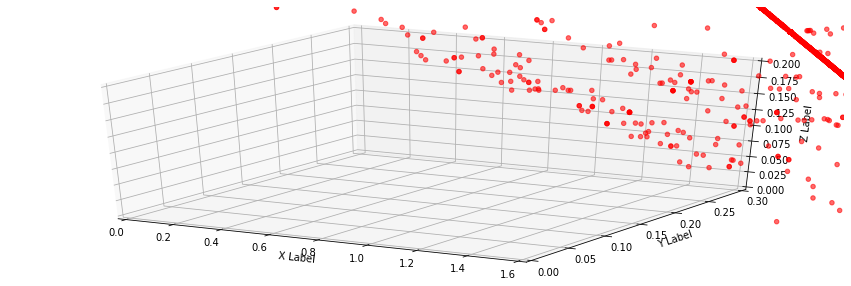

In [131]:
fig=plt.figure(figsize=(15,5))
#ax.scatter(EP2[0],EP2[1],EP2[2], c='g',marker='o')
#ax.scatter(EP3[0],EP3[1],EP3[2], c='b',marker='o')
ax = plt.axes(projection="3d") 
ax.scatter(e5_all[:,0],e5_all[:,1],e5_all[:,2], c='r', marker='o')
ax.set_xlim([0, 1.6])
ax.set_ylim([0, 0.3])
ax.set_zlim([0, 0.2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

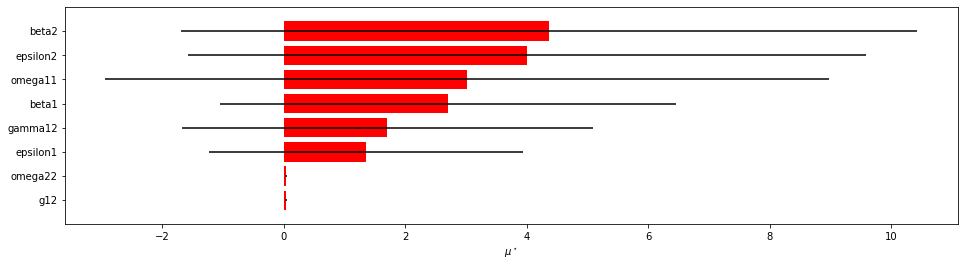

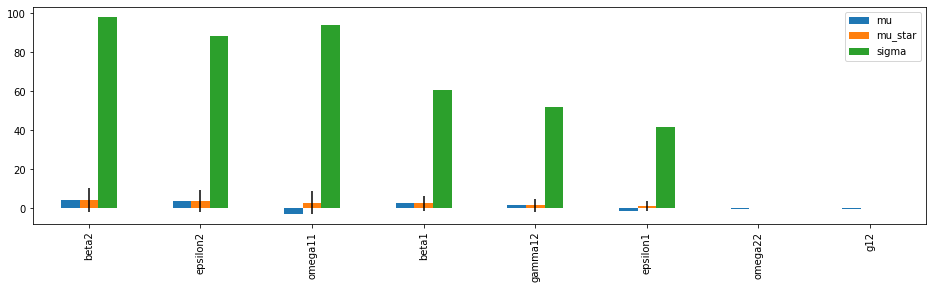

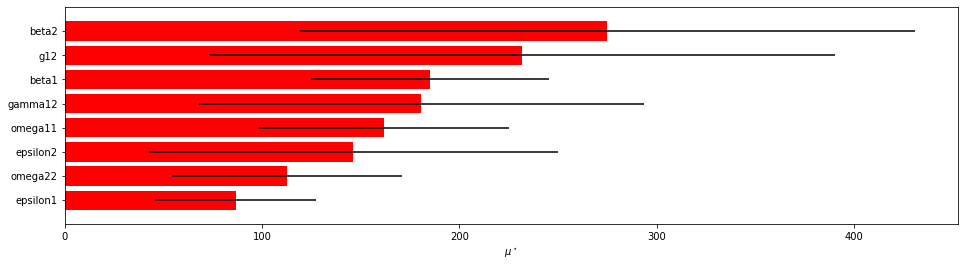

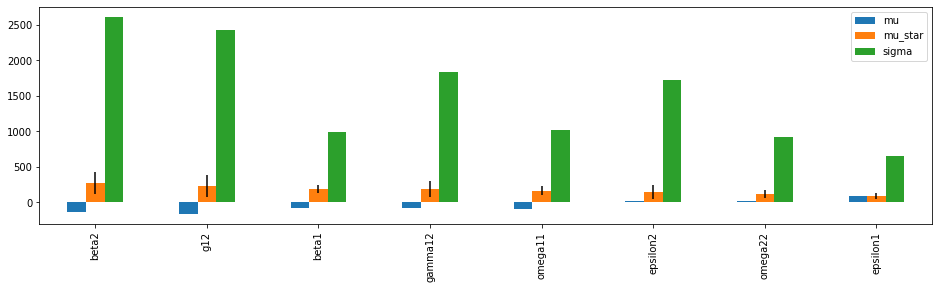

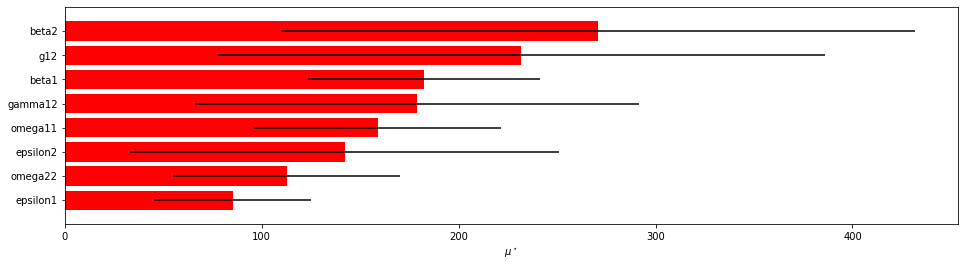

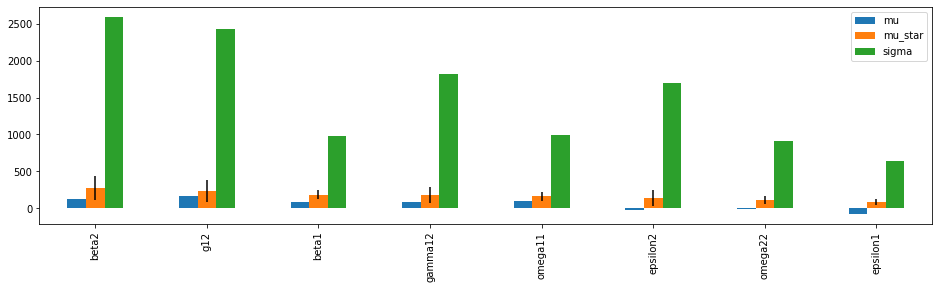

In [132]:

MORRIS=[e5_all[:,0],e5_all[:,1],e5_all[:,2]]
RESULTS=[]
for i in MORRIS:
    SI=morris.analyze(problem,param_values2, i)
    SI_DF=SI.to_df()
    # Sorting i descending order by mu_star
    SI_DF.sort_values(by=['mu_star'], inplace=True, ascending=False)
    #print(SI_DF)
    #Plotting in two differint wayys
    fig, ax1 = plt.subplots(1)
    plt.gcf().set_size_inches(16, 4)
    SALib.plotting.morris.horizontal_bar_plot(ax1,SI , {'color':'r'}, sortby='mu_star', unit='')
    plt.show()
    barplot(SI_DF)
    plt.gcf().set_size_inches(16, 4)
    
    #print(SI_DF.to_latex(index=True))
    RESULTS.append(SI_DF)
Sixm, Siy1m, Siy2m=RESULTS       

In [133]:
for i in RESULTS:
    print(i.to_latex(index=True))
    

\begin{tabular}{lrrrr}
\toprule
{} &        mu &   mu\_star &      sigma &  mu\_star\_conf \\
\midrule
beta2    &  4.256387 &  4.364906 &  98.343246 &      6.060467 \\
epsilon2 &  3.994395 &  4.009752 &  88.468016 &      5.581312 \\
omega11  & -2.971328 &  3.018547 &  93.847486 &      5.956809 \\
beta1    &  2.612319 &  2.707546 &  60.769972 &      3.753876 \\
gamma12  &  1.606025 &  1.700938 &  52.220909 &      3.381679 \\
epsilon1 & -1.330097 &  1.350734 &  41.716083 &      2.583098 \\
omega22  & -0.005442 &  0.039261 &   0.275077 &      0.016338 \\
g12      & -0.006694 &  0.031751 &   0.246197 &      0.015575 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
{} &          mu &     mu\_star &        sigma &  mu\_star\_conf \\
\midrule
beta2    & -134.250169 &  275.042975 &  2612.205333 &    155.961676 \\
g12      & -168.775816 &  231.761750 &  2429.809599 &    158.391211 \\
beta1    &  -81.766273 &  185.123854 &   986.094259 &     60.156033 \\
gamma12  &  -83.279235 &  18

# Sensivity analysis for interior EP using rbd_fast method

In [134]:
    Y3 = np.zeros([param_values3.shape[0]])

    Ef2=[]
    Ef3=[]
    Ef4=[]
    Ef5=[]
    Lf1=[]
    Lf2=[]
    Lf3=[]
    Lf4=[]
    Lf5=[]
    for i in np.arange(len(Y3)): 
        beta1, beta2, epsilon1,epsilon2,g12,gamma12,omega11,omega22 =param_values3[i]
        U0=(beta1*gamma12 + beta1*omega22 - beta2*g12 + beta2*omega11 + g12*gamma12 + omega11*omega22)
        U1=(-epsilon1*(gamma12 + omega22) + epsilon2*(g12 - omega11) - g12*gamma12 - omega11*omega22)
        U2=(beta1*omega22 - beta2*g12 - epsilon1*(beta2 + omega22) + epsilon2*(beta1 + g12))
        U3=(beta1*gamma12 + beta2*omega11 + epsilon1*(beta2 - gamma12) - epsilon2*(beta1 + omega11))             
        
        E0=(epsilon1*(gamma12 + omega22) - epsilon2*(g12 - omega11) + g12*gamma12 + omega11*omega22)
        E1=(beta1*omega22 - beta2*g12 - epsilon1*(beta2 + omega22) + epsilon2*(beta1 + g12))
        E2=(beta1*gamma12 + beta2*omega11 + epsilon1*(beta2 - gamma12) - epsilon2*(beta1 + omega11))

        L0=(-3*U1*U2*beta1 - 3*U1*U2*omega11 - 3*U1*U3*beta2 - 3*U1*U3*omega22 + 3*U2*U3*g12*gamma12 + 3*U2*U3*omega11*omega22 - (-U1 + U2*omega11 + U3*omega22)**2)/U0**2
        L1=(-4*(3*U1*U2*beta1 + 3*U1*U2*omega11 + 3*U1*U3*beta2 + 3*U1*U3*omega22 - 3*U2*U3*g12*gamma12 - 3*U2*U3*omega11*omega22 + (-U1 + U2*omega11 + U3*omega22)**2)**3 + (-27*U1*U2*U3*beta1*gamma12 - 27*U1*U2*U3*beta1*omega22 + 27*U1*U2*U3*beta2*g12 - 27*U1*U2*U3*beta2*omega11 - 27*U1*U2*U3*g12*gamma12 - 27*U1*U2*U3*omega11*omega22 + 2*(-U1 + U2*omega11 + U3*omega22)**3 + 9*(-U1 + U2*omega11 + U3*omega22)*(U1*U2*beta1 + U1*U2*omega11 + U1*U3*beta2 + U1*U3*omega22 - U2*U3*g12*gamma12 - U2*U3*omega11*omega22))**2)/U0**6
        L2=(-27*U1*U2*U3*beta1*gamma12 - 27*U1*U2*U3*beta1*omega22 + 27*U1*U2*U3*beta2*g12 - 27*U1*U2*U3*beta2*omega11 - 27*U1*U2*U3*g12*gamma12 - 27*U1*U2*U3*omega11*omega22 + 2*(-U1 + U2*omega11 + U3*omega22)**3 + 9*(-U1 + U2*omega11 + U3*omega22)*(U1*U2*beta1 + U1*U2*omega11 + U1*U3*beta2 + U1*U3*omega22 - U2*U3*g12*gamma12 - U2*U3*omega11*omega22))/(2*U0**3)


        mu0=-4*beta1**2*epsilon1 + beta1**2*omega11**2 - 4*beta1**2*omega11 + 4*beta1*epsilon1**2 - 2*beta1*epsilon1*omega11**2 + 2*beta1*epsilon1*omega11 - 2*beta1*omega11**2 + epsilon1**2*omega11**2 + 2*epsilon1**2*omega11 + epsilon1**2 + 2*epsilon1*omega11**2 + 2*epsilon1*omega11 + omega11**2
        mu1=-4*beta2**2*epsilon2 + beta2**2*omega22**2 - 4*beta2**2*omega22 + 4*beta2*epsilon2**2 - 2*beta2*epsilon2*omega22**2 + 2*beta2*epsilon2*omega22 - 2*beta2*omega22**2 + epsilon2**2*omega22**2 + 2*epsilon2**2*omega22 + epsilon2**2 + 2*epsilon2*omega22**2 + 2*epsilon2*omega22 + omega22**2
        mu2=np.sqrt(L1+0j)/2 +L2
        
        EP1=np.array([0,0,0])
        EP2=np.array([1, 0, 0])
        EP3=np.array([(epsilon1 + omega11)/(beta1 + omega11), (beta1 - epsilon1)/(beta1 + omega11), 0])
        EP4=np.array([(epsilon2 + omega22)/(beta2 + omega22), 0, (beta2 - epsilon2)/(beta2 + omega22)])
        EP5=np.array([E0/U0,E1/U0,E2/U0])
        
        lambda1=np.array([1, -epsilon1, -epsilon2])
        lambda2=np.array([-1, beta1 - epsilon1, beta2 - epsilon2])
        lambda3=np.array([E2/(beta1 + omega11),((omega11*(epsilon1-beta1-1)-epsilon1)+np.sqrt(0j+mu0))/(2*(beta1 + omega11)),((omega11*(epsilon1-beta1-1)-epsilon1)-np.sqrt(0j+mu0))/(2*(beta1 + omega11))])
        lambda4=np.array([E1/(beta2 + omega22),((omega22*(epsilon2-beta2-1)-epsilon2)+np.sqrt(0j+mu1))/(2*(beta2 + omega22)),((omega22*(epsilon2-beta2-1)-epsilon1)-np.sqrt(0j+mu1))/(2*(beta2 + omega22))])
        lambda51=L0/(3*mu2**(1/3))-(mu2**(1/3))/3+(U1-U2*omega11-U3*omega22)/(3*U0)
        lambda52=L0/((3*mu2**(1/3))*(-1/2+0.8660254037844386j))-(mu2**(1/3))*(-1/2+0.8660254037844386j)/3+(U1-U2*omega11-U3*omega22)/(3*U0)
        lambda53=L0/((3*mu2**(1/3))*(-1/2-0.8660254037844386j))-(mu2**(1/3))*(-1/2-0.8660254037844386j)/3+(U1-U2*omega11-U3*omega22)/(3*U0)
        lambda5=np.array([Lambda51,Lambda52,Lambda53])
        Ef2.append(EP2)                   
        Ef3.append(EP3)     
        Ef4.append(EP4)                 
        Ef5.append(EP5)
        Lf1.append(lambda1) 
        Lf2.append(lambda2)
        Lf3.append(lambda3)
        Lf4.append(lambda4)
        Lf5.append(lambda5)
       
       
        
        #[(EP5[0]>0 and EP5[1]>0 and EP5[2]>0)]
        print(EP5>0)
        #print(EP5)
        print(lambda5<0)
        #print(lambda6[(lambda5[0]<0 and lambda5[1]<0 and lambda5[2]<0 )]) # to get only positive EP
        print(lambda3<0) # to get only stable EP
        #print(EV3[(lambda3[0]<0 and EV3[1]<0 and lambda3[2]<0)]) # to get only positive EP
        print(lambda4<0) # to get only stable EP
        #print(lambda4[(lambda4[0]<0 and lambda4[1]<0 and lambda4[2]<0)]) # to get only positive EP
        #print(beta1>epsilon1,beta2>epsilon2)
        print(param_values1[i])
       
       

[False  True False]
[ True False False]
[ True  True  True]
[False  True  True]
[5.49472461e+05 2.41879883e+05 5.18602832e+01 6.76790137e+01
 1.68192852e+02 1.81445498e+01 4.59175195e+00 8.99416074e+01]
[ True  True  True]
[ True False False]
[False  True  True]
[False  True  True]
[1.25254121e+06 2.41879883e+05 5.18602832e+01 6.76790137e+01
 1.68192852e+02 1.81445498e+01 4.59175195e+00 8.99416074e+01]
[ True  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[5.49472461e+05 1.73525977e+05 5.18602832e+01 6.76790137e+01
 1.68192852e+02 1.81445498e+01 4.59175195e+00 8.99416074e+01]
[ True  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[5.49472461e+05 2.41879883e+05 8.50524414e+00 6.76790137e+01
 1.68192852e+02 1.81445498e+01 4.59175195e+00 8.99416074e+01]
[ True  True  True]
[ True False False]
[ True  True  True]
[ True  True  True]
[5.49472461e+05 2.41879883e+05 5.18602832e+01 2.54957324e+01
 1.68192852e+02 1.81445498e+01 4.59175195e+00 8

[False  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[1.64313496e+06 1.41366113e+06 4.24862207e+01 3.33074512e+01
 4.49424102e+02 2.51970605e+00 3.27161895e+01 4.30675449e+01]
[ True  True  True]
[ True False False]
[ True  True  True]
[ True  True  True]
[4.71353711e+05 1.34530723e+06 4.24862207e+01 3.33074512e+01
 4.49424102e+02 2.51970605e+00 3.27161895e+01 4.30675449e+01]
[ True  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[4.71353711e+05 1.41366113e+06 1.16299316e+01 3.33074512e+01
 4.49424102e+02 2.51970605e+00 3.27161895e+01 4.30675449e+01]
[False  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[4.71353711e+05 1.41366113e+06 4.24862207e+01 9.87229492e+00
 4.49424102e+02 2.51970605e+00 3.27161895e+01 4.30675449e+01]
[ True  True  True]
[ True False False]
[ True  True  True]
[ True  True  True]
[4.71353711e+05 1.41366113e+06 4.24862207e+01 3.33074512e+01
 4.90436992e+02 2.51970605e+00 3.27161895e+01 4

[False  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[2.18996621e+06 3.19998633e+05 8.03730566e+01 2.70580762e+01
 4.86921602e+02 1.62695686e+01 7.64653145e+01 9.93164199e+01]
[ True  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[2.18996621e+06 3.19998633e+05 7.37330957e+01 9.11141699e+01
 4.86921602e+02 1.62695686e+01 7.64653145e+01 9.93164199e+01]
[ True  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[2.18996621e+06 3.19998633e+05 7.37330957e+01 2.70580762e+01
 4.52939492e+02 1.62695686e+01 7.64653145e+01 9.93164199e+01]
[ True  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[2.18996621e+06 3.19998633e+05 7.37330957e+01 2.70580762e+01
 4.86921602e+02 1.08008732e+01 7.64653145e+01 9.93164199e+01]
[False  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[2.18996621e+06 3.19998633e+05 7.37330957e+01 2.70580762e+01
 4.86921602e+02 1.62695686e+01 7.37309941e+01 9

[False  True  True]
[ True  True  True]
[6.48341504e+05 2.45972002e+06 3.84338916e+01 4.94114746e+00
 1.61455020e+02 1.30176479e+01 9.44825322e+01 1.69450205e+01]
[False  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[6.48341504e+05 2.45972002e+06 3.84338916e+01 9.83888330e+01
 7.18125586e+01 1.30176479e+01 9.44825322e+01 1.69450205e+01]
[ True  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[6.48341504e+05 2.45972002e+06 3.84338916e+01 9.83888330e+01
 1.61455020e+02 1.06348593e+01 9.44825322e+01 1.69450205e+01]
[ True  True  True]
[ True False False]
[False  True  True]
[False  True  True]
[6.48341504e+05 2.45972002e+06 3.84338916e+01 9.83888330e+01
 1.61455020e+02 1.30176479e+01 3.04213135e+01 1.69450205e+01]
[ True  True False]
[ True False False]
[ True  True  True]
[False  True  True]
[6.48341504e+05 2.45972002e+06 3.84338916e+01 9.83888330e+01
 1.61455020e+02 1.30176479e+01 9.44825322e+01 3.99914346e+01]
[ True  True False]
[ Tru

 8.64600195e+01 1.31348343e+01 5.69832822e+01 7.94437705e+01]
[ True False  True]
[ True False False]
[False  True  True]
[ True  True  True]
[1.58576650e+06 8.97345020e+05 5.09326416e+01 6.08925830e+01
 8.64600195e+01 5.17772949e-01 1.79215635e+01 7.94437705e+01]
[False  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[1.58576650e+06 8.97345020e+05 5.09326416e+01 6.08925830e+01
 8.64600195e+01 5.17772949e-01 5.69832822e+01 5.24911846e+01]
[False  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[1.58576650e+06 8.97345020e+05 5.09326416e+01 6.08925830e+01
 8.64600195e+01 5.17772949e-01 5.69832822e+01 7.94437705e+01]
[ True  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[2.03494932e+06 2.03494932e+06 6.35290381e+01 4.24373975e+01
 5.96777559e+02 3.13493428e+00 6.79205635e+01 2.49218457e+00]
[False  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[3.35866504e+05 2.03494932e+06 6.35290381e+01 

[ True False False]
[False  True  True]
[ True  True  True]
[7.06930566e+05 3.94455566e+05 3.54068506e+01 2.68139600e+01
 1.28058809e+02 6.25990303e+00 7.88578447e+01 3.68664971e+01]
[ True  True  True]
[ True False False]
[ True  True  True]
[ True  True  True]
[7.06930566e+05 3.94455566e+05 3.54068506e+01 2.68139600e+01
 1.28058809e+02 6.25990303e+00 6.47956260e+01 7.63188330e+01]
[ True  True  True]
[ True False False]
[ True  True  True]
[ True  True  True]
[7.06930566e+05 1.13170127e+06 6.03067041e+01 9.52641455e+01
 3.30193770e+02 1.36426417e+01 7.88578447e+01 7.63188330e+01]
[ True  True False]
[ True False False]
[ True  True  True]
[False  True  True]
[2.13259775e+06 3.94455566e+05 6.03067041e+01 9.52641455e+01
 3.30193770e+02 1.36426417e+01 7.88578447e+01 7.63188330e+01]
[False  True False]
[ True False False]
[False  True  True]
[ True  True  True]
[2.13259775e+06 1.13170127e+06 3.54068506e+01 9.52641455e+01
 3.30193770e+02 1.36426417e+01 7.88578447e+01 7.63188330e+01]
[ Tru

In [135]:
 ed5_all=np.stack(Ef5)

                S1
gamma12   0.003622
beta2     0.003142
beta1     0.000284
omega11   0.000025
g12       0.000012
omega22  -0.000077
epsilon2 -0.000079
epsilon1 -0.000454
\begin{tabular}{lr}
\toprule
{} &        S1 \\
\midrule
gamma12  &  0.003622 \\
beta2    &  0.003142 \\
beta1    &  0.000284 \\
omega11  &  0.000025 \\
g12      &  0.000012 \\
omega22  & -0.000077 \\
epsilon2 & -0.000079 \\
epsilon1 & -0.000454 \\
\bottomrule
\end{tabular}

                S1
gamma12   0.001053
beta2     0.000765
omega11   0.000432
g12       0.000192
beta1     0.000051
omega22   0.000022
epsilon1 -0.000155
epsilon2 -0.000163
\begin{tabular}{lr}
\toprule
{} &        S1 \\
\midrule
gamma12  &  0.001053 \\
beta2    &  0.000765 \\
omega11  &  0.000432 \\
g12      &  0.000192 \\
beta1    &  0.000051 \\
omega22  &  0.000022 \\
epsilon1 & -0.000155 \\
epsilon2 & -0.000163 \\
\bottomrule
\end{tabular}

                S1
gamma12   0.001052
beta2     0.000764
omega11   0.000432
g12       0.000192
beta1     0.0

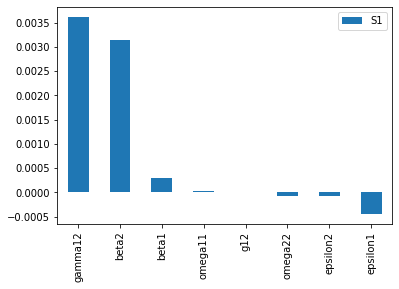

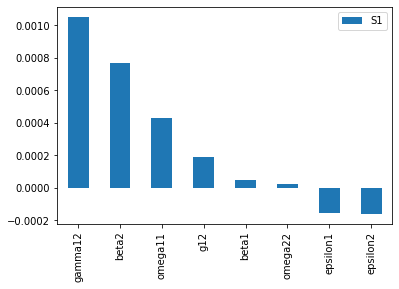

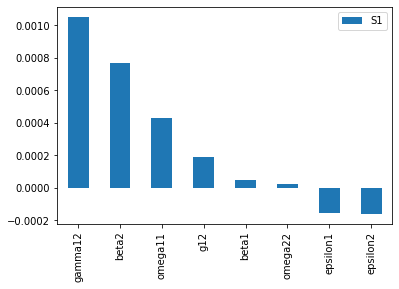

In [136]:
for n in range (3):
    Si =  rbd_fast.analyze(problem,param_values3, ed5_all[:,n])
    #print(Si)
    Si_df=Si.to_df()
    # sort S1 - descending order
    Si_df.sort_values(by=['S1'], inplace=True, ascending=False)
    print(Si_df)
    barplot(Si_df)
    print(Si_df.to_latex(index=True))